# Emotion Detector 

https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data <br>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys
import cv2
import numpy as np

import keras
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.layers.core import Activation, Flatten, Dropout, Dense

Using TensorFlow backend.


### Converting CSV to IMAGES

#### Below code is to be run only once to generate data
https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/discussion/29428

In [2]:
# label_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
# data = np.genfromtxt('data/fer2013.csv',delimiter=',',dtype=None, encoding='utf8')

# labels = data[1:,0].astype(np.int32)
# image_buffer = data[1:,1]
# usage = data[1:,2]

# images = np.array([np.fromstring(image, np.uint8, sep=' ') for image in image_buffer])

# dataset = zip(labels, images, usage)

In [8]:
# output_path = os.getcwd()+"\\data"

# %time
# for i, d in enumerate(dataset):
#     usage_path = os.path.join(output_path, d[-1])
#     label_path = os.path.join(usage_path, label_names[d[0]])
#     img = d[1].reshape((48,48))
#     img_name = '%06d.jpg' % i
#     img_path = os.path.join(label_path, img_name)
#     if not os.path.exists(usage_path):
#         os.system('mkdir {}'.format(usage_path))
#     if not os.path.exists(label_path):
#         os.system('mkdir {}'.format(label_path))
#     cv2.imwrite(img_path, img)
#     print('Write {}'.format(img_path))

Wall time: 0 ns
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\000000.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\000001.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\000002.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\000003.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\000004.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\000005.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\000006.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\000007.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\000008.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\000009.jpg

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\000145.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\000146.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\000147.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\000148.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\000149.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\000150.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\000151.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\000152.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\000153.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\000154.jpg
Write C:\Users\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\000256.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\000257.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\000258.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\000259.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\000260.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\000261.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\000262.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\000263.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\000264.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\000265.jpg
Wri

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\000386.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\000387.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\000388.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\000389.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\000390.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\000391.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\000392.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\000393.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\000394.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\000395.jpg
Write C:

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\000521.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\000522.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\000523.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\000524.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\000525.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\000526.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\000527.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\000528.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\000529.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\000530.jpg
Wri

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\000631.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\000632.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\000633.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\000634.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\000635.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\000636.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\000637.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\000638.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\000639.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\000640.jpg
Write C:\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\000766.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\000767.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\000768.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\000769.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\000770.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\000771.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\000772.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\000773.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\000774.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\000775.jpg
Write 

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\000923.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\000924.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\000925.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\000926.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\000927.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\000928.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\000929.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\000930.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\000931.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\000932.jpg
Write C:\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\001070.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\001071.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\001072.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\001073.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\001074.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\001075.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\001076.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\001077.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\001078.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\001079.jpg
Write C:\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\001199.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\001200.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\001201.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\001202.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\001203.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\001204.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\001205.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\001206.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\001207.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\001208.jpg
Write C

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\001329.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\001330.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\001331.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\001332.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\001333.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\001334.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\001335.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\001336.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\001337.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\001338.jpg
Write C:\User

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\001463.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\001464.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\001465.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\001466.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\001467.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\001468.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\001469.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\001470.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\001471.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\001472.jpg
Write 

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\001684.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\001685.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\001686.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\001687.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\001688.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\001689.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\001690.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\001691.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\001692.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\001693.jpg
Write 

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\001826.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\001827.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\001828.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\001829.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\001830.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\001831.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\001832.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\001833.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\001834.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\001835.jpg
Write C:

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\001977.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\001978.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\001979.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\001980.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\001981.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\001982.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\001983.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\001984.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\001985.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\001986.jpg
Write C:\Use

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\002119.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\002120.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\002121.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\002122.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\002123.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\002124.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\002125.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\002126.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\002127.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\002128.jpg
Write C:

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\002207.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\002208.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\002209.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\002210.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\002211.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\002212.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\002213.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\002214.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\002215.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\002216.jpg
Writ

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\002370.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\002371.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\002372.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\002373.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\002374.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\002375.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\002376.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\002377.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\002378.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\002379.jpg
Write C

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\002512.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\002513.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\002514.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\002515.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\002516.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\002517.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\002518.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\002519.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\002520.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\002521.jpg
Write C

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\002649.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\002650.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\002651.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\002652.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\002653.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\002654.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\002655.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\002656.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\002657.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\002658.jpg
Write C:\Users\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\002815.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\002816.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\002817.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\002818.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\002819.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\002820.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\002821.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\002822.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\002823.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\002824.jpg
Write 

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\002963.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\002964.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\002965.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\002966.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\002967.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\002968.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\002969.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\002970.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\002971.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\002972.jpg
Wri

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\003107.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\003108.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\003109.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\003110.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\003111.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\003112.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\003113.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\003114.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\003115.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\003116.jpg
Writ

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\003222.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\003223.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\003224.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\003225.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\003226.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\003227.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\003228.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\003229.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\003230.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\003231.jpg
W

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\003374.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\003375.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\003376.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\003377.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\003378.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\003379.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\003380.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\003381.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\003382.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\003383.jpg
Write 

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\003535.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\003536.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\003537.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\003538.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\003539.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\003540.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\003541.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\003542.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\003543.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\003544.jpg
Write C:\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\003695.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\003696.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\003697.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\003698.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\003699.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\003700.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\003701.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\003702.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\003703.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\003704.jpg
W

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\003845.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\003846.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\003847.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\003848.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\003849.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\003850.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\003851.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\003852.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\003853.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\003854.jpg
Write C:\Users

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\003990.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\003991.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\003992.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\003993.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\003994.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\003995.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\003996.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\003997.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\003998.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\003999.jpg
Write

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\004121.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\004122.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\004123.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\004124.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\004125.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\004126.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\004127.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\004128.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\004129.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\004130.jpg
Write C:

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\004234.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\004235.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\004236.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\004237.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\004238.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\004239.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\004240.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\004241.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\004242.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\004243.jpg
Write C:

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\004383.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\004384.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\004385.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\004386.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\004387.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\004388.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\004389.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\004390.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\004391.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\004392.jpg

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\004519.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\004520.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\004521.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\004522.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\004523.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\004524.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\004525.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\004526.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\004527.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\004528.jpg
Write C:\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\004676.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\004677.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\004678.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\004679.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\004680.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\004681.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\004682.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\004683.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\004684.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\004685.jpg
Write C:\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\004846.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\004847.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\004848.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\004849.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\004850.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\004851.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\004852.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\004853.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\004854.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\004855.jpg
Write C:

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\004995.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\004996.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\004997.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\004998.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\004999.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\005000.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\005001.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\005002.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\005003.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\005004.jpg
W

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\005155.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\005156.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\005157.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\005158.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\005159.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\005160.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\005161.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\005162.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\005163.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\005164.jpg
Write C:\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\005294.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\005295.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\005296.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\005297.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\005298.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\005299.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\005300.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\005301.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\005302.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\005303.jpg
Write C:

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\005412.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\005413.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\005414.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\005415.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\005416.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\005417.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\005418.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\005419.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\005420.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\005421.jpg
Write C:\U

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\005536.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\005537.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\005538.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\005539.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\005540.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\005541.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\005542.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\005543.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\005544.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\005545.jpg
Write C:\Use

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\005636.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\005637.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\005638.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\005639.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\005640.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\005641.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\005642.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\005643.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\005644.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\005645.jpg
Write C:\User

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\005797.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\005798.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\005799.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\005800.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\005801.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\005802.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\005803.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\005804.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\005805.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\005806.jpg
Write C:\Users\12ra

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\005969.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\005970.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\005971.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\005972.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\005973.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\005974.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\005975.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\005976.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\005977.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\005978.jpg
Write C:\Us

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\006125.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\006126.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\006127.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\006128.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\006129.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\006130.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\006131.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\006132.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\006133.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\006134.jpg
Write C:\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\006269.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\006270.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\006271.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\006272.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\006273.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\006274.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\006275.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\006276.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\006277.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\006278.

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\006421.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\006422.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\006423.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\006424.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\006425.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\006426.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\006427.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\006428.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\006429.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\006430.jpg
Wr

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\006519.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\006520.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\006521.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\006522.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\006523.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\006524.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\006525.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\006526.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\006527.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\006528.jpg
Write C

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\006688.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\006689.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\006690.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\006691.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\006692.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\006693.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\006694.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\006695.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\006696.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\006697.jpg
Write C:\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\006854.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\006855.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\006856.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\006857.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\006858.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\006859.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\006860.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\006861.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\006862.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\006863.jpg
Write C:\Users

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\006993.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\006994.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\006995.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\006996.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\006997.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\006998.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\006999.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\007000.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\007001.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\007002.jpg
Write

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\007143.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\007144.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\007145.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\007146.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\007147.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\007148.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\007149.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\007150.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\007151.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\007152.jpg
Write C:\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\007246.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\007247.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\007248.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\007249.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\007250.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\007251.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\007252.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\007253.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\007254.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\007255.jpg
Write C:\U

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\007384.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\007385.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\007386.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\007387.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\007388.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\007389.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\007390.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\007391.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\007392.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\007393.jpg
Write C

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\007535.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\007536.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\007537.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\007538.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\007539.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\007540.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\007541.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\007542.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\007543.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\007544.jpg
Write C:\User

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\007713.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\007714.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\007715.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\007716.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\007717.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\007718.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\007719.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\007720.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\007721.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\007722.jpg
Write C:\User

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\007859.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\007860.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\007861.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\007862.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\007863.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\007864.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\007865.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\007866.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\007867.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\007868.jpg
Write 

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008020.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\008021.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008022.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\008023.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\008024.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\008025.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\008026.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008027.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\008028.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008029.jpg
Write C:\U

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\008169.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\008170.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008171.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008172.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\008173.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008174.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\008175.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008176.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\008177.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\008178.jpg
Write C

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008327.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\008328.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\008329.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\008330.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008331.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008332.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\008333.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008334.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008335.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\008336.jpg
Write C:

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\008478.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008479.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008480.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\008481.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\008482.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\008483.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008484.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008485.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\008486.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\008487.jpg
Wri

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008622.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\008623.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\008624.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\008625.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008626.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\008627.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\008628.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\008629.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\008630.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\008631.jpg
Write 

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\008772.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\008773.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008774.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008775.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\008776.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\008777.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\008778.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\008779.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\008780.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\008781.jpg
Write C:\Users\1

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\008926.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\008927.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\008928.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\008929.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\008930.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008931.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\008932.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008933.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\008934.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\008935.jpg
Writ

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\009100.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\009101.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\009102.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\009103.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\009104.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\009105.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\009106.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\009107.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\009108.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\009109.jpg
Write C:\Us

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\009252.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\009253.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\009254.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\009255.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\009256.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\009257.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\009258.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\009259.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\009260.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\009261.jpg
Write C:\U

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\009448.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\009449.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\009450.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\009451.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\009452.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\009453.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\009454.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\009455.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\009456.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\009457.jpg
Write C:

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\009621.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\009622.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\009623.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\009624.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\009625.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\009626.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\009627.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\009628.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\009629.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\0096

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\009802.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\009803.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\009804.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\009805.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\009806.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\009807.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\009808.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\009809.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\009810.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\009811.jpg
Writ

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\009954.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\009955.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\009956.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\009957.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\009958.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\009959.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\009960.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\009961.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\009962.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\009963.jpg
Write 

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\010120.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\010121.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\010122.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\010123.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\010124.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\010125.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\010126.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\010127.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\010128.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\010129.jpg
Write C:\Users

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\010266.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\010267.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\010268.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\010269.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\010270.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\010271.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\010272.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\010273.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\010274.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\010275.jpg
Write

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\010431.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\010432.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\010433.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\010434.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\010435.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\010436.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\010437.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\010438.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\010439.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\010440.jpg
Write C:\Us

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\010604.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\010605.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\010606.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\010607.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\010608.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\010609.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\010610.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\010611.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\010612.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\010613.jpg
Write C:\Use

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\010749.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\010750.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\010751.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\010752.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\010753.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\010754.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\010755.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\010756.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\010757.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\010758.jpg
Write C:\Us

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\010902.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\010903.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\010904.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\010905.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\010906.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\010907.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\010908.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\010909.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\010910.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\010911.jpg
Wri

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\011081.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\011082.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\011083.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\011084.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\011085.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\011086.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\011087.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\011088.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\011089.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\011090.jpg
Writ

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\011241.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\011242.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\011243.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\011244.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\011245.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\011246.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\011247.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\011248.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\011249.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\011250.jpg
Wr

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\011383.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\011384.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\011385.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\011386.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\011387.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\011388.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\011389.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\011390.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\011391.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\011392.jpg
Write C:

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\011468.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\011469.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\011470.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\011471.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\011472.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\011473.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\011474.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\011475.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\011476.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\011477.jpg
Write C:\Us

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\011615.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\011616.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\011617.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\011618.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\011619.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\011620.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\011621.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\011622.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\011623.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\011624.jpg

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\011743.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\011744.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\011745.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\011746.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\011747.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\011748.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\011749.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\011750.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\011751.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\011752.jpg
Write C:\Users

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\011908.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\011909.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\011910.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\011911.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\011912.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\011913.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\011914.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\011915.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\011916.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\011917.jpg
Write C:\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\012060.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\012061.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\012062.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\012063.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\012064.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\012065.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\012066.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\012067.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\012068.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\012069.jpg
Wr

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\012164.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\012165.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\012166.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\012167.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\012168.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\012169.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\012170.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\012171.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\012172.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\012173.jpg
Wr

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\012304.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\012305.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\012306.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\012307.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\012308.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\012309.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\012310.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\012311.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\012312.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\012313.jpg
Write C:\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\012388.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\012389.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\012390.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\012391.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\012392.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\012393.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\012394.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\012395.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\012396.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\012397.jpg
Write C:\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\012505.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\012506.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\012507.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\012508.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\012509.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\012510.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\012511.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\012512.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\012513.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\012514.jpg
Wr

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\012671.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\012672.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\012673.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\012674.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\012675.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\012676.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\012677.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\012678.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\012679.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\012680.jpg
Write C

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\012847.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\012848.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\012849.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\012850.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\012851.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\012852.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\012853.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\012854.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\012855.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\012856.jpg
Write C

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\012999.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\013000.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\013001.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\013002.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\013003.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\013004.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\013005.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\013006.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\013007.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\013008.jpg
Write 

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\013167.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\013168.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\013169.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\013170.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\013171.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\013172.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\013173.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\013174.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\013175.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\013176.jpg
Wri

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\013335.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\013336.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\013337.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\013338.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\013339.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\013340.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\013341.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\013342.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\013343.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\013344.jpg
Write C:

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\013468.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\013469.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\013470.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\013471.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\013472.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\013473.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\013474.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\013475.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\013476.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\013477.jpg
Write C:\Users

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\013631.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\013632.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\013633.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\013634.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\013635.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\013636.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\013637.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\013638.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\013639.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\013640.jpg
Write C:\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\013793.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\013794.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\013795.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\013796.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\013797.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\013798.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\013799.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\013800.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\013801.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\013802.jpg
Write C:\Users\1

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\013890.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\013891.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\013892.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\013893.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\013894.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\013895.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\013896.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\013897.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\013898.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\013899.jpg
Wri

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\014010.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\014011.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\014012.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\014013.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\014014.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\014015.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\014016.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\014017.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\014018.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\014019.jpg
Write C:\Users

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\014187.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\014188.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\014189.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\014190.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\014191.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\014192.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\014193.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\014194.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\014195.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\014196.jpg
Write C:\Use

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\014346.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\014347.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\014348.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\014349.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\014350.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\014351.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\014352.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\014353.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\014354.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\014355.jpg
Write C:\Use

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\014490.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\014491.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\014492.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\014493.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\014494.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\014495.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\014496.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\014497.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\014498.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\014499.jpg
Write C:\User

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\014653.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\014654.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\014655.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\014656.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\014657.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\014658.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\014659.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\014660.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\014661.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\014662.jpg
Write C:\U

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\014842.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\014843.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\014844.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\014845.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\014846.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\014847.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\014848.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\014849.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\014850.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\014851.jpg
Write C

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\015004.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\015005.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\015006.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\015007.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\015008.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\015009.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\015010.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\015011.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\015012.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\015013.jpg
Writ

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\015149.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\015150.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\015151.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\015152.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\015153.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\015154.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\015155.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\015156.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\015157.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\015158.jpg
Writ

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\015310.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\015311.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\015312.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\015313.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\015314.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\015315.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\015316.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\015317.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\015318.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\015319.jpg
W

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\015497.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\015498.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\015499.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\015500.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\015501.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\015502.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\015503.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\015504.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\015505.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\015506.jpg
Write C:\U

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\015664.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\015665.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\015666.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\015667.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\015668.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\015669.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\015670.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\015671.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\015672.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\015673.jpg
Write C:\Us

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\015822.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\015823.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\015824.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\015825.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\015826.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\015827.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\015828.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\015829.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\015830.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\015831.jpg
Wr

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\015969.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\015970.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\015971.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\015972.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\015973.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\015974.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\015975.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\015976.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\015977.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\015978.jpg
W

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\016143.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\016144.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\016145.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\016146.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\016147.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\016148.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\016149.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\016150.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\016151.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\016152.jpg
Write 

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\016280.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\016281.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\016282.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\016283.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\016284.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\016285.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\016286.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\016287.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\016288.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\016289.jpg
Write C:\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\016437.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\016438.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\016439.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\016440.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\016441.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\016442.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\016443.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\016444.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\016445.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\016446.jpg
Write 

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\016535.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\016536.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\016537.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\016538.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\016539.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\016540.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\016541.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\016542.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\016543.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\016544.jpg
Write C:\U

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\016711.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\016712.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\016713.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\016714.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\016715.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\016716.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\016717.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\016718.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\016719.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\016720.jpg
Wri

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\016859.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\016860.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\016861.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\016862.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\016863.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\016864.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\016865.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\016866.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\016867.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\016868.jpg
Write C:\Use

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\017012.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\017013.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\017014.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\017015.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\017016.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\017017.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\017018.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\017019.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\017020.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\017021.jpg
Wr

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\017181.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\017182.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\017183.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\017184.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\017185.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\017186.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\017187.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\017188.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\017189.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\017190.jpg
Write C:\Users\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\017345.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\017346.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\017347.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\017348.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\017349.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\017350.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\017351.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\017352.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\017353.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\017354.jp

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\017451.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\017452.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\017453.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\017454.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\017455.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\017456.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\017457.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\017458.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\017459.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\017460.jpg
Write C:\User

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\017656.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\017657.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\017658.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\017659.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\017660.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\017661.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\017662.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\017663.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\017664.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\017665.jpg
Write C:\Users\1

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\017824.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\017825.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\017826.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\017827.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\017828.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\017829.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\017830.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\017831.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\017832.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\017833.jpg
Write C:

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\018007.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\018008.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\018009.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\018010.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\018011.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\018012.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\018013.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\018014.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\018015.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\018016.jpg
Write C:\Use

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\018156.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\018157.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\018158.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\018159.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\018160.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\018161.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\018162.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\018163.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\018164.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\018165.jpg
Write

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\018318.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\018319.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\018320.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\018321.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\018322.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\018323.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\018324.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\018325.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\018326.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\018327.jpg
Write C:\Us

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\018423.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\018424.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\018425.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\018426.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\018427.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\018428.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\018429.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\018430.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\018431.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\018432.jpg
Write C:\U

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\018640.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\018641.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\018642.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\018643.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\018644.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\018645.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\018646.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\018647.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\018648.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\018649.jpg
Write C:\Use

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\018818.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\018819.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\018820.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\018821.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\018822.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\018823.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\018824.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\018825.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\018826.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\018827.jpg
Wri

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\018997.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\018998.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\018999.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\019000.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\019001.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\019002.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\019003.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\019004.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\019005.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\019006.jpg
Write C:\Users\12r

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\019172.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\019173.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\019174.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\019175.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\019176.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\019177.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\019178.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\019179.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\019180.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\019181.jpg


Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\019392.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\019393.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\019394.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\019395.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\019396.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\019397.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\019398.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\019399.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\019400.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\019401.jpg
Write C:\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\019521.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\019522.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\019523.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\019524.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\019525.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\019526.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\019527.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\019528.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\019529.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\019530.jpg
Write C:\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\019714.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\019715.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\019716.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\019717.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\019718.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\019719.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\019720.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\019721.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\019722.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\019723.jpg
W

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\019873.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\019874.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\019875.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\019876.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\019877.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\019878.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\019879.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\019880.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\019881.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\019882.jpg
Write C:\Users\1

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\019988.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\019989.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\019990.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\019991.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\019992.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\019993.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\019994.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\019995.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\019996.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\019997.jpg
Write 

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\020147.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\020148.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\020149.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\020150.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\020151.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\020152.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\020153.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\020154.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\020155.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\020156.jpg
Writ

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\020320.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\020321.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\020322.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\020323.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\020324.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\020325.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\020326.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\020327.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\020328.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\020329.jpg
Write C:\Users\12

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\020464.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\020465.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\020466.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\020467.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\020468.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\020469.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\020470.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\020471.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\020472.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\020473.jpg
Write C:\U

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\020560.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\020561.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\020562.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\020563.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\020564.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\020565.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\020566.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\020567.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\020568.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\020569.jpg
Write C:\U

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\020712.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\020713.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\020714.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\020715.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\020716.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\020717.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\020718.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\020719.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\020720.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\020721.jpg
Write C:\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\020889.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\020890.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\020891.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\020892.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\020893.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\020894.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\020895.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\020896.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\020897.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\020898.jpg
Write C:\Us

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\021047.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\021048.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\021049.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\021050.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\021051.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\021052.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\021053.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\021054.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\021055.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\021056.jpg
Write C:\Users

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\021233.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\021234.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\021235.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\021236.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\021237.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\021238.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\021239.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\021240.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\021241.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\021242.jpg


Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\021397.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\021398.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\021399.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\021400.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\021401.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\021402.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\021403.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\021404.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\021405.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\021406.jpg
Wri

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\021577.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\021578.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\021579.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\021580.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\021581.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\021582.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\021583.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\021584.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\021585.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\021586.jpg
Write 

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\021721.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\021722.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\021723.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\021724.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\021725.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\021726.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\021727.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\021728.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\021729.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\021730.jpg
W

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\021848.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\021849.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\021850.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\021851.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\021852.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\021853.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\021854.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\021855.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\021856.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\021857.jpg
Writ

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\022018.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\022019.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\022020.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\022021.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\022022.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\022023.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\022024.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\022025.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\022026.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\022027.j

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\022191.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\022192.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\022193.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\022194.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\022195.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\022196.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\022197.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\022198.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\022199.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\022200.jpg
Write C:\Use

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\022300.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\022301.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\022302.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\022303.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\022304.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\022305.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\022306.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\022307.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\022308.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\022309.jpg
Write C:\Use

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\022401.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\022402.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\022403.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\022404.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\022405.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\022406.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\022407.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\022408.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\022409.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\022410.jpg
Write

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\022591.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\022592.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\022593.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\022594.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\022595.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\022596.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\022597.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\022598.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\022599.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\022600.jpg
Write C:\User

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\022759.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\022760.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\022761.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\022762.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\022763.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\022764.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\022765.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\022766.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\022767.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\022768.jpg
Write C:\Us

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\022920.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\022921.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\022922.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\022923.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\022924.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\022925.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\022926.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\022927.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\022928.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\022929.jpg
Write C:

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\023084.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\023085.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\023086.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\023087.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\023088.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\023089.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\023090.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\023091.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\023092.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\023093.jpg
Write

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\023237.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\023238.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\023239.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\023240.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\023241.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\023242.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\023243.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\023244.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\023245.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\023246.jpg
Write C:\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\023376.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\023377.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\023378.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\023379.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\023380.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\023381.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\023382.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\023383.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\023384.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\023385.jpg

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\023586.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\023587.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\023588.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\023589.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\023590.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\023591.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\023592.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\023593.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\023594.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\023595.jpg
Write C

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\023765.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\023766.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\023767.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\023768.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\023769.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\023770.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\023771.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\023772.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\023773.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\023774.jpg
Write

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\023939.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\023940.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\023941.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\023942.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\023943.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\023944.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\023945.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\023946.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\023947.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\023948.jpg
Write 

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\024109.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\024110.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\024111.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\024112.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\024113.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\024114.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\024115.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\024116.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\024117.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\024118.jpg
Write C:\Users\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\024276.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\024277.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\024278.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\024279.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\024280.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\024281.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\024282.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\024283.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\024284.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\024285.jpg
Write C:\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\024520.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\024521.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\024522.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\024523.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\024524.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\024525.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\024526.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\024527.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\024528.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\024529.jpg
Write C:\User

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\024672.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\024673.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\024674.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\024675.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\024676.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\024677.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\024678.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\024679.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\024680.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\024681.jpg
Write C:\Users\12ra

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\024847.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\024848.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\024849.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\024850.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\024851.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\024852.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\024853.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\024854.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\024855.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\024856

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\024997.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\024998.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\024999.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\025000.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\025001.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\025002.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\025003.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\025004.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\025005.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\025006.jpg
Write C:\Users\12r

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\025160.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\025161.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\025162.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\025163.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\025164.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\025165.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\025166.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\025167.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\025168.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\025169.jpg
Write 

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\025324.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\025325.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\025326.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\025327.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\025328.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\025329.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\025330.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\025331.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\025332.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\025333.jpg
Write C:\U

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\025426.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\025427.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\025428.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\025429.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\025430.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\025431.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\025432.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\025433.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\025434.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\025435.jpg
Write

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\025510.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\025511.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\025512.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\025513.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\025514.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\025515.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\025516.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\025517.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\025518.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\025519.jpg
Write C

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\025682.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\025683.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\025684.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\025685.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\025686.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\025687.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\025688.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\025689.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\025690.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\025691.jpg
Writ

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\025860.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\025861.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\025862.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\025863.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\025864.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\025865.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\025866.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\025867.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\025868.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\025869.jpg
Write C:

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\026035.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\026036.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\026037.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\026038.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\026039.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\026040.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\026041.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\026042.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\026043.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\026044.jpg
Writ

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\026216.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\026217.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\026218.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\026219.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\026220.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\026221.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\026222.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\026223.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\026224.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\026225.jpg
W

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\026337.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\026338.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\026339.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\026340.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\026341.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\026342.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\026343.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\026344.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\026345.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\026346.jpg
Write C:\Users

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\026475.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\026476.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\026477.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\026478.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\026479.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\026480.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\026481.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\026482.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\026483.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\026484.jpg
Write C:\U

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\026661.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\026662.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\026663.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\026664.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\026665.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\026666.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\026667.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\026668.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\026669.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\026670.jpg
Write C:

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\026827.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\026828.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\026829.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\026830.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\026831.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\026832.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\026833.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\026834.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\026835.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\026836.jpg
Write C:\Users

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\026998.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\026999.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\027000.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\027001.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\027002.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\027003.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\027004.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\027005.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\027006.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\027007.jpg
Write C:\U

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\027165.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\027166.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\027167.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\027168.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\027169.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\027170.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\027171.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\027172.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\027173.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\027174.jpg
Wr

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\027331.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\027332.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\027333.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\027334.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\027335.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\027336.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\027337.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\027338.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\027339.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\027340.jpg
Write 

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\027463.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\027464.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\027465.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\027466.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\027467.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\027468.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\027469.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\027470.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\027471.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\027472.jpg
Write C:\Users\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\027618.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\027619.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\027620.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\027621.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\027622.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\027623.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\027624.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\027625.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\027626.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\027627.jpg
Wr

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\027775.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\027776.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\027777.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\027778.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\027779.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\027780.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\027781.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\027782.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\027783.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\027784.jpg
Write C:

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\027898.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\027899.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\027900.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\027901.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\027902.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\027903.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\027904.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\027905.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\027906.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\027907.jpg
W

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\028003.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\028004.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\028005.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\028006.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\028007.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\028008.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\028009.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\028010.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\028011.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\028012.jpg
Writ

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\028109.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\028110.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\028111.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\028112.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\028113.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\028114.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\028115.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\028116.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\028117.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\028118.jpg
Write C:\Users

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\028192.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\028193.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\028194.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\028195.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\028196.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\028197.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\028198.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\028199.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\028200.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\028201.jpg
Wr

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\028363.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\028364.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\028365.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\028366.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\028367.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\028368.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\028369.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\028370.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\028371.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\028372.jpg


Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Angry\028498.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\028499.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\028500.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\028501.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\028502.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\028503.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\028504.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\028505.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\028506.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\028507

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\028649.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Disgust\028650.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\028651.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Neutral\028652.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Surprise\028653.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Fear\028654.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\028655.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\028656.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Sad\028657.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Training\Happy\028658.jpg
Wri

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\028734.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\028735.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\028736.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\028737.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\028738.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\028739.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\028740.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\028741.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\028742.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\028

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\028902.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\028903.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\028904.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\028905.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\028906.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\028907.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Disgust\028908.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\028909.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\028910.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Publ

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\029034.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\029035.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\029036.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\029037.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\029038.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\029039.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\029040.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\029041.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\029042.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\0

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\029155.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\029156.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\029157.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Disgust\029158.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\029159.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\029160.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\029161.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\029162.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\029163.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surpr

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\029241.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\029242.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\029243.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\029244.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\029245.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\029246.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\029247.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\029248.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\029249.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Public

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\029416.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\029417.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\029418.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\029419.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\029420.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\029421.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\029422.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\029423.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\029424.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\029425

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\029560.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\029561.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\029562.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\029563.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\029564.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\029565.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\029566.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\029567.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\029568.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\029569.

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\029722.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\029723.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\029724.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\029725.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\029726.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\029727.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\029728.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\029729.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\029730.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\02

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\029879.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\029880.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\029881.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\029882.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\029883.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\029884.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\029885.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\029886.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\029887.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\030008.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\030009.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\030010.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\030011.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\030012.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\030013.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\030014.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\030015.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\030016.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sa

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\030093.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\030094.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\030095.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\030096.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\030097.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\030098.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\030099.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\030100.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\030101.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\030232.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\030233.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\030234.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\030235.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\030236.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\030237.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\030238.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\030239.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\030240.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\030

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\030381.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\030382.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\030383.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\030384.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\030385.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\030386.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\030387.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\030388.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\030389.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Su

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\030552.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\030553.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\030554.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\030555.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\030556.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\030557.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\030558.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\030559.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\030560.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\03

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\030714.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\030715.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\030716.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\030717.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\030718.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Disgust\030719.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\030720.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\030721.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\030722.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\030864.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\030865.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\030866.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\030867.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\030868.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\030869.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\030870.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\030871.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\030872.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\S

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\030959.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\030960.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\030961.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\030962.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\030963.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\030964.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\030965.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\030966.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\030967.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\0

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\031046.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\031047.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\031048.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\031049.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\031050.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\031051.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\031052.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\031053.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\031054.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Su

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\031142.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\031143.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\031144.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\031145.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\031146.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\031147.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\031148.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\031149.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\031150.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\03

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\031309.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\031310.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\031311.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\031312.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\031313.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\031314.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\031315.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\031316.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\031317.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\031484.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\031485.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\031486.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\031487.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\031488.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\031489.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\031490.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\031491.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\031492.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\0

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\031660.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\031661.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\031662.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\031663.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\031664.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\031665.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\031666.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\031667.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\031668.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\0

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\031840.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\031841.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\031842.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\031843.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\031844.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\031845.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\031846.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\031847.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\031848.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\031996.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\031997.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\031998.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Neutral\031999.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\032000.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\032001.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\032002.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\032003.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\032004.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTes

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\032160.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Angry\032161.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\032162.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\032163.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Sad\032164.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Surprise\032165.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\032166.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\032167.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Fear\032168.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PublicTest\Happy\032

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Surprise\032299.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\032300.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\032301.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fear\032302.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\032303.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\032304.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\032305.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\032306.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\032307.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTe

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\032558.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\032559.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\032560.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\032561.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\032562.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fear\032563.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\032564.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\032565.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fear\032566.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\032737.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fear\032738.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\032739.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\032740.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\032741.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\032742.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\032743.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\032744.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\032745.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\032836.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\032837.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\032838.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fear\032839.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\032840.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\032841.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\032842.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\032843.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\032844.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTes

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\032980.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\032981.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\032982.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\032983.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\032984.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Surprise\032985.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fear\032986.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\032987.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Surprise\032988.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Privat

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\033155.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fear\033156.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\033157.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Surprise\033158.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\033159.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\033160.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\033161.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\033162.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\033163.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Pri

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fear\033303.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fear\033304.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\033305.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Surprise\033306.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\033307.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\033308.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\033309.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\033310.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\033311.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Privat

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\033480.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Disgust\033481.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\033482.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Surprise\033483.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Surprise\033484.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\033485.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\033486.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\033487.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fear\033488.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\033618.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\033619.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\033620.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\033621.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\033622.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fear\033623.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fear\033624.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\033625.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fear\033626.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fe

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\033763.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Disgust\033764.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\033765.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\033766.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\033767.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\033768.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\033769.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\033770.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\033771.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Priva

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\033928.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\033929.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\033930.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Surprise\033931.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\033932.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\033933.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\033934.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\033935.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\033936.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateT

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\034098.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\034099.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fear\034100.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fear\034101.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\034102.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\034103.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Surprise\034104.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\034105.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\034106.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Privat

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\034224.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\034225.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\034226.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Surprise\034227.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\034228.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Surprise\034229.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\034230.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\034231.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fear\034232.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fear\034396.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\034397.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\034398.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\034399.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Surprise\034400.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\034401.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\034402.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\034403.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\034404.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTe

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\034529.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\034530.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\034531.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Surprise\034532.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\034533.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\034534.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\034535.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Surprise\034536.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\034537.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Pri

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Surprise\034706.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fear\034707.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\034708.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Surprise\034709.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Surprise\034710.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Surprise\034711.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\034712.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fear\034713.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\034714.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\da

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\034899.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\034900.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\034901.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\034902.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\034903.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Surprise\034904.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\034905.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\034906.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\034907.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Privat

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\035054.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\035055.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\035056.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\035057.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\035058.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\035059.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Surprise\035060.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\035061.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\035062.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateT

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\035267.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\035268.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fear\035269.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\035270.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\035271.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\035272.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\035273.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fear\035274.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\035275.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sur

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\035424.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\035425.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\035426.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fear\035427.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Surprise\035428.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\035429.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\035430.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\035431.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Surprise\035432.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\035593.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\035594.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\035595.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\035596.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\035597.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Happy\035598.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\035599.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Sad\035600.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Surprise\035601.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTes

Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Fear\035773.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\035774.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\035775.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\035776.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\035777.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\035778.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\035779.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Angry\035780.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\PrivateTest\Neutral\035781.jpg
Write C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\data\Priv

In [9]:
# np.unique(usage)

array(['PrivateTest', 'PublicTest', 'Training'], dtype='<U9215')

### Setting up dataset
- Performing above code we'll get three folders - <font color='steelblue'>['PrivateTest', 'PublicTest', 'Training']</font> each with six folders <font color='blue'>['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']</font>
- I will merge 'PrivateTest' & 'PublicTest' folders to create single folder <font color='steelblue'>'test'</font>

In [2]:
num_classes = 7
img_rows, img_cols = 48, 48
batch_size = 16

train_data_dir = 'data\\train'
validation_data_dir = 'data\\test'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      shear_range=0.3,
      zoom_range=0.3,
      width_shift_range=0.4,
      height_shift_range=0.4,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## EDA

In [3]:
path_test = os.getcwd() + '\\data\\train'
path_train = os.getcwd() + '\data\\test'

In [4]:
for mdir,subdir,files in os.walk(path_test):
    print(os.path.basename(mdir) + " : " + str(len(files)))

train : 0
Angry : 3995
Disgust : 436
Fear : 4097
Happy : 7215
Neutral : 4965
Sad : 4830
Surprise : 3171


In [5]:
for mdir,subdir,files in os.walk(path_train):
    print(os.path.basename(mdir) + " : " + str(len(files)))

test : 0
Angry : 958
Disgust : 111
Fear : 1024
Happy : 1774
Neutral : 1233
Sad : 1247
Surprise : 831


### Observation:
- In both train and test folders data is imbalanced due to disgust sub-folder.
- We can choose upsampling using data augmentation or discard it.

## Keras LittleVGG Model

In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = 'same', kernel_initializer="he_normal",
                 input_shape = (img_rows, img_cols, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding = "same", kernel_initializer="he_normal", 
                 input_shape = (img_rows, img_cols, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #2: second CONV => ELU => CONV => ELU => POOL
# layer set
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #3: third CONV => ELU => CONV => ELU => POOL
# layer set
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #4: third CONV => ELU => CONV => ELU => POOL
# layer set
model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #5: first set of FC => RELU layers
model.add(Flatten())
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block #6: second set of FC => RELU layers
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block #7: softmax classifier
model.add(Dense(num_classes, kernel_initializer="he_normal"))
model.add(Activation("softmax"))

print(model.summary())













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 32)        128       
_______________

## Training our model

In [7]:
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint(os.getcwd()+"\\Trained Models\\emotion_little_vgg_3.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

# Reduce learning rate when a metric has stopped improving.
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics = ['accuracy'])

nb_train_samples = 28709
nb_validation_samples = 7178
epochs = 10

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
1794/1794 [==============================] - 411s 229ms/step - loss: 2.0360 - acc: 0.2032 - val_loss: 1.7798 - val_acc: 0.2543

Epoch 00001: val_loss improved from inf to 1.77976, saving model to C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\Trained Models\emotion_little_vgg_3.h5
Epoch 2/10
1794/1794 [==============================] - 383s 214ms/step - loss: 1.8044 - acc: 0.2474 - val_loss: 1.7942 - val_acc: 0.2445

Epoch 00002: val_loss did not improve from 1.77976
Epoch 3/10
1794/1794 [==============================] - 386s 215ms/step - loss: 1.7941 - acc: 0.2522 - val_loss: 1.7681 - val_acc: 0.2706

Epoch 00003: val_loss improved from 1.77976 to 1.76811, saving model to C:\Users\12rah\AEGIS\SharedFolder\Projects\DL_EmotionDetector\Trained Models\emotion_little_vgg_3.h5
Epoch 4/10
1794/1794 [==============================] - 406s 227ms/step - loss: 1.7889 - acc

Found 7178 images belonging to 7 classes.
Confusion Matrix
[[   0    0    0  410   35  446   67]
 [   0    0    0   61    2   43    5]
 [   0    0    1  453   66  325  179]
 [   0    0    0 1048   76  590   60]
 [   0    0    0  678   90  406   59]
 [   0    0    0  516   41  660   30]
 [   0    0    1  215   65   85  465]]
Classification Report
              precision    recall  f1-score   support

       Angry       0.00      0.00      0.00       958
     Disgust       0.00      0.00      0.00       111
        Fear       0.50      0.00      0.00      1024
       Happy       0.31      0.59      0.41      1774
     Neutral       0.24      0.07      0.11      1233
         Sad       0.26      0.53      0.35      1247
    Surprise       0.54      0.56      0.55       831

    accuracy                           0.32      7178
   macro avg       0.26      0.25      0.20      7178
weighted avg       0.30      0.32      0.24      7178



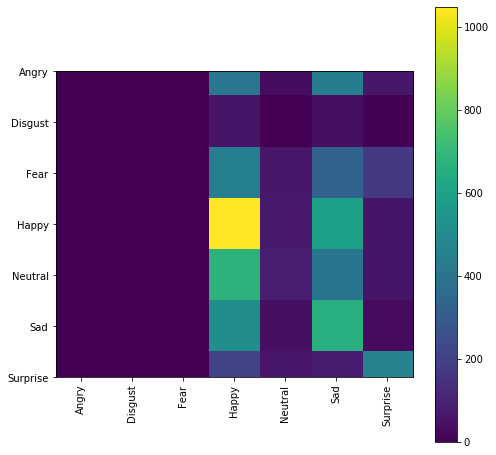

In [8]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

nb_train_samples = 28709
nb_validation_samples = 7178

# We need to recreate our validation generator with shuffle = false
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

### Loading our saved model

In [12]:
class_labels

{0: 'Angry',
 1: 'Disgust',
 2: 'Fear',
 3: 'Happy',
 4: 'Neutral',
 5: 'Sad',
 6: 'Surprise'}

In [11]:
from keras.models import load_model

classifier = load_model(os.getcwd()+'\\Trained Models\\emotion_little_vgg_3.h5')

### Get our class labels

In [ ]:
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print(class_labels)

### Let's try this on our webcam


In [23]:
import cv2
import numpy as np
from time import sleep
from keras.preprocessing.image import img_to_array

# https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_classifier = cv2.CascadeClassifier(os.getcwd()+'\\haarcascade_frontalface_default.xml')

def face_detector(img):
       
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return (0,0,0,0), np.zeros((48,48), np.uint8), img
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]

    try:
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation = cv2.INTER_AREA)
    except:
        return (x,w,y,h), np.zeros((48,48), np.uint8), img
    return (x,w,y,h), roi_gray, img

cap = cv2.VideoCapture(0)


while True:
    ret, frame = cap.read()
    rect, face, image = face_detector(frame)
    if np.sum([face]) != 0.0:
        roi = face.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)

        # make a prediction on the ROI, then lookup the class
        preds = classifier.predict(roi)[0]
        label = class_labels[preds.argmax()]  
        label_position = (rect[0] + int((rect[1]/2)), rect[2] + 25)
        cv2.putText(image, label, label_position , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
    else:
        cv2.putText(image, "No Face Found", (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
        
    cv2.imshow('All', image)
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
           

In [24]:
cap.release()
cv2.destroyAllWindows()      